In [219]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import re

In [200]:
sf_data = pd.read_csv('Salaries.csv')

<ipython-input-200-43ba913357bd>:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_data = pd.read_csv('Salaries.csv')


In [201]:
sf_data.shape

(148654, 13)

In [202]:
sf_data

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


<AxesSubplot:>

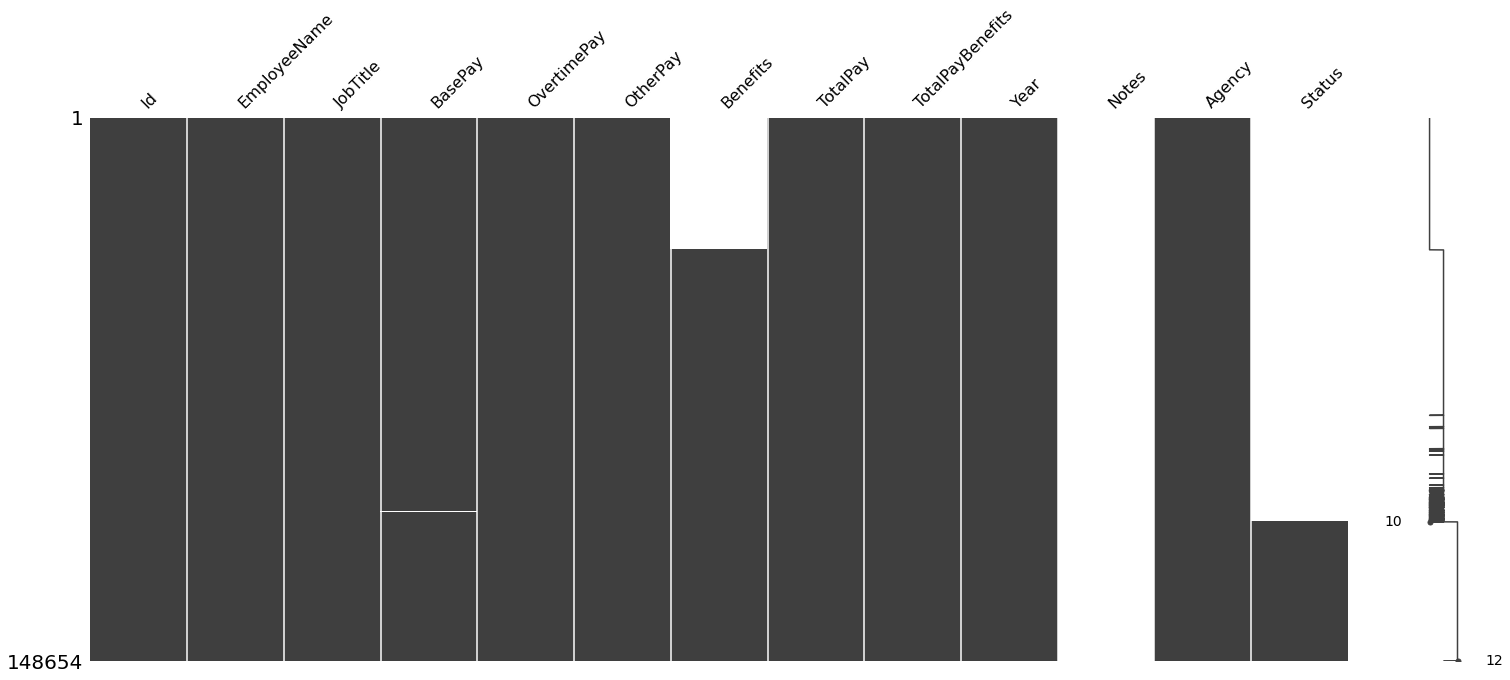

In [203]:
msno.matrix(sf_data)

In [188]:
def summary_statistic(df) -> pd.DataFrame:

        """
        function input: it get a pandas dataframe as a csv file
        output: return: retuen a information about columns as pandas dataframe
        """

        feature_describe = df.describe().T.reset_index().rename(
                               columns={'index':'feature'}).drop(columns='count')

        feature_info = pd.concat([df.dtypes,
                                   df.nunique(),
                                   df.isna().sum(),
                                   df.count()], axis=1,
                    keys=['type', 'count_unique', 'count_nan', 'count']).reset_index().rename(columns={'index':'feature'})

        summary_statistic_result = feature_info.merge(feature_describe, how='left', on='feature')

        return summary_statistic_result

In [212]:
summary_statistic(sf_data)

,feature,type,count_unique,count_nan,count,mean,std,min,25%,50%,75%,max
0,Id,int64,111868,0,111868,92327.867245,32544.350818,36160.0,64126.7500,92113.500,120681.2500,148650.00
1,EmployeeName,object,76425,0,111868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JobTitle,object,1109,0,111868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BasePay,float64,82639,0,111868,67215.612380,43414.618026,0.0,33665.6125,65548.635,95229.0300,319275.01
4,OvertimePay,float64,50491,0,111868,5267.136470,11765.309871,0.0,0.0000,0.000,4867.7975,220909.48
5,OtherPay,float64,63511,0,111868,3655.452223,8039.125719,0.0,0.0000,821.100,4308.6175,342802.63
6,Benefits,float64,98355,0,111868,25117.342789,15371.434833,0.0,12158.6425,28699.575,35609.4725,96570.66
7,TotalPay,float64,104596,0,111868,76138.201073,51266.884806,0.0,37064.6800,72635.195,107541.0650,471952.64
8,TotalPayBenefits,float64,108027,0,111868,101255.543862,65244.388427,0.0,49698.1275,101977.380,143001.7200,510732.68
9,Year,int64,3,0,111868,2013.012175,0.818014,2012.0,2012.0000,2013.000,2014.0000,2014.00


In [190]:
# sf_data['BasePay'] = pd.to_numeric(sf_data['BasePay'],errors='coerce')
# sf_data['OvertimePay'] = pd.to_numeric(sf_data['OvertimePay'],errors='coerce')
# sf_data['OtherPay'] = pd.to_numeric(sf_data['OtherPay'],errors='coerce')
# sf_data['Benefits'] = pd.to_numeric(sf_data['Benefits'],errors='coerce')

In [205]:
for i in ['BasePay','OvertimePay','OtherPay','Benefits']:
    sf_data[i] = pd.to_numeric(sf_data[i],errors='coerce')

In [206]:
sf_data.drop(columns=['Notes','Agency','Status'], inplace=True)

In [207]:
sf_data[sf_data['TotalPay']<0]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014


In [208]:
sf_data = sf_data[]

SyntaxError: invalid syntax (<ipython-input-208-273a82ab199a>, line 1)

In [209]:
# sf_data = sf_data[sf_data['BasePay']>=0]
# sf_data = sf_data[sf_data['OvertimePay']>=0]
# sf_data = sf_data[sf_data['OtherPay']>=0]
# sf_data = sf_data[sf_data['Benefits']>=0]
# sf_data = sf_data[sf_data['TotalPay']>=0]
# sf_data = sf_data[sf_data['TotalPayBenefits']>=0]
# sf_data.shape

In [210]:
for i in ['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']:
    sf_data = sf_data[sf_data[i]>=0]
    

In [213]:
sf_data.

(111868, 10)

/home/sinanazem/anaconda3/envs/sparkenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BasePay'>

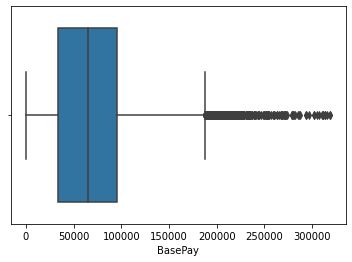

In [211]:
sns.boxplot(sf_data['BasePay'])

In [195]:
sf_data[sf_data['BasePay'] == 'Not Provided']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [61]:
sf_data = sf_data[sf_data['BasePay'] < 0]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
72832,72833,Irwin Sidharta,Junior Clerk,-166.01,249.02,0.0,6.56,83.01,89.57,2012,NaN,San Francisco,NaN
72865,72866,Robert Scott,Junior Clerk,-121.63,182.7,0.0,5.44,61.07,66.51,2012,NaN,San Francisco,NaN
72872,72873,Chung Huey Kung,Junior Clerk,-109.22,163.83,0.0,4.32,54.61,58.93,2012,NaN,San Francisco,NaN
72874,72875,Jordan Li,Junior Clerk,-106.60,159.9,0.0,4.66,53.30,57.96,2012,NaN,San Francisco,NaN
72878,72879,Richard Jackson,Junior Clerk,-101.88,153.08,0.0,4.55,51.20,55.75,2012,NaN,San Francisco,NaN
72884,72885,DiMarco McGhee-Stewart,Junior Clerk,-93.14,139.97,0.0,4.17,46.83,51.00,2012,NaN,San Francisco,NaN
72888,72889,Leopoldo Marasigan,Junior Clerk,-87.38,131.06,0.0,3.89,43.68,47.57,2012,NaN,San Francisco,NaN
72894,72895,Douglas Avalos,Junior Clerk,-75.67,113.76,0.0,3.39,38.09,41.48,2012,NaN,San Francisco,NaN
72908,72909,Norma Rodriguez,Junior Clerk,-59.59,89.65,0.0,2.68,30.06,32.74,2012,NaN,San Francisco,NaN
72920,72921,Charles Williams,Junior Clerk,-30.58,45.87,0.0,1.36,15.29,16.65,2012,NaN,San Francisco,NaN


# Now we can take the case of "JobTitle" column.

It contains 2159 unique values. It means it contains 2159 Jobtitles.

In [221]:
sf_data["JobTitle"] = sf_data["JobTitle"].str.strip()

In [224]:
sf_data["JobTitle"].value_counts()[:60]

Transit Operator                  6975
Special Nurse                     4381
Registered Nurse                  3725
Public Svc Aide-Public Works      2514
Police Officer 3                  2411
Custodian                         2409
Firefighter                       2348
Recreation Leader                 1968
Patient Care Assistant            1940
Deputy Sheriff                    1914
Police Officer                    1469
Public Service Trainee            1327
Police Officer 2                  1138
Attorney (Civil/Criminal)         1124
Porter                            1092
Sergeant 3                        1046
General Laborer                   1021
EMT/Paramedic/Firefighter          914
Gardener                           889
Parking Control Officer            857
Senior Clerk                       835
Library Page                       799
Eligibility Worker                 759
Clerk                              759
Senior Clerk Typist                737
Licensed Vocational Nurse

In [225]:
def JobTitle_New(job):
    if bool(re.search('nurse\s|\snurse\s|\snurse$|nurses\s', job.lower())):
        return 'Nurse'
    elif job.lower().__contains__('transit operator'):
        return 'Transit Operator'
    elif job.lower().__contains__('clerk'):
        return 'Clerk'
    elif job.lower().__contains__('police'):
        return 'Police'
    elif job.lower().__contains__('firefighter'):
        return 'Firefighter'
    elif job.lower().__contains__('engineer'):
        return 'Engineer'
    elif job.lower().__contains__('custodian'):
        return 'Custodian'
    elif bool(re.search('sheriff\s|\ssheriff$|.sheriff|^sheriff$', job.lower())):
        return 'Sheriff'
    elif job.lower().__contains__('eligibility worker'):
        return 'Eligibility Worker'
    elif job.lower().__contains__('recreation leader'):
        return 'Recreation Leader'
    elif job.lower().__contains__('public svc aide-public works'):
        return 'Public Svc Aide-Public Works'
    elif job.lower().__contains__('guard'):
        return 'Guard'
    elif job.lower().__contains__('administrative analyst'):
        return 'Administrative Analyst'
    elif job.lower().__contains__('patient care assistant'):
        return 'Patient Care Assistant'
    elif job.lower().__contains__('sergeant'):
        return 'Sergeant'
    elif job.lower().__contains__('attorney'):
        return 'Attorney'
    elif job.lower().__contains__('public service trainee'):
        return 'Public Service Trainee'
    elif job.lower().__contains__('general laborer'):
        return 'General Laborer'
    elif bool(re.search('^porter$|^porter\s', job.lower())):
        return 'Porter'
    elif job.lower().__contains__('gardener'):
        return 'Gardener'
    elif job.lower().__contains__('parking control officer'):
        return 'Parking Control Officer'
    elif job.lower().__contains__('library'):
        return 'Library Page & Assistant'
    elif job.lower().__contains__('food service'):
        return 'Food Service'
    elif job.lower().__contains__('public service'):
        return 'Public Service'
    elif job.lower().__contains__('librarian'):
        return 'Librarian'
    elif job.lower().__contains__('truck driver'):
        return 'Truck Driver'
    elif job.lower().__contains__('safety'):
        return 'Public Safety Officer'
    elif job.lower().__contains__('social worker'):
        return 'Social Worker'
    elif job.lower().__contains__('medical'):
        return 'Medical Staff'
    
sf_data['JobTitle_New'] = sf_data['JobTitle'].map(JobTitle_New)

In [226]:
sf_data

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_New
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,None
36160,36161,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,Police
36161,36162,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,None
36162,36163,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,None
36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,Firefighter
...,...,...,...,...,...,...,...,...,...,...,...
148644,148645,Randy D Winn,"Stationary Eng, Sewage Plant",0.00,0.00,0.00,0.00,0.00,0.00,2014,None
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,None
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,None
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,Custodian


In [227]:
summary_statistic(sf_data)

,feature,type,count_unique,count_nan,count,mean,std,min,25%,50%,75%,max
0,Id,int64,111868,0,111868,92327.867245,32544.350818,36160.0,64126.7500,92113.500,120681.2500,148650.00
1,EmployeeName,object,76425,0,111868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JobTitle,object,1109,0,111868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BasePay,float64,82639,0,111868,67215.612380,43414.618026,0.0,33665.6125,65548.635,95229.0300,319275.01
4,OvertimePay,float64,50491,0,111868,5267.136470,11765.309871,0.0,0.0000,0.000,4867.7975,220909.48
5,OtherPay,float64,63511,0,111868,3655.452223,8039.125719,0.0,0.0000,821.100,4308.6175,342802.63
6,Benefits,float64,98355,0,111868,25117.342789,15371.434833,0.0,12158.6425,28699.575,35609.4725,96570.66
7,TotalPay,float64,104596,0,111868,76138.201073,51266.884806,0.0,37064.6800,72635.195,107541.0650,471952.64
8,TotalPayBenefits,float64,108027,0,111868,101255.543862,65244.388427,0.0,49698.1275,101977.380,143001.7200,510732.68
9,Year,int64,3,0,111868,2013.012175,0.818014,2012.0,2012.0000,2013.000,2014.0000,2014.00


In [233]:
sf_data.loc[sf_data['JobTitle_New'].isna() == True,'JobTitle_New'] = sf_data.loc[
                                                      sf_data['JobTitle_New'].isna() == True,'JobTitle_New'].fillna(sf_data['JobTitle']).str.capitalize()

In [234]:
summary_statistic(sf_data)

,feature,type,count_unique,count_nan,count,mean,std,min,25%,50%,75%,max
0,Id,int64,111868,0,111868,92327.867245,32544.350818,36160.0,64126.7500,92113.500,120681.2500,148650.00
1,EmployeeName,object,76425,0,111868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JobTitle,object,1109,0,111868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BasePay,float64,82639,0,111868,67215.612380,43414.618026,0.0,33665.6125,65548.635,95229.0300,319275.01
4,OvertimePay,float64,50491,0,111868,5267.136470,11765.309871,0.0,0.0000,0.000,4867.7975,220909.48
5,OtherPay,float64,63511,0,111868,3655.452223,8039.125719,0.0,0.0000,821.100,4308.6175,342802.63
6,Benefits,float64,98355,0,111868,25117.342789,15371.434833,0.0,12158.6425,28699.575,35609.4725,96570.66
7,TotalPay,float64,104596,0,111868,76138.201073,51266.884806,0.0,37064.6800,72635.195,107541.0650,471952.64
8,TotalPayBenefits,float64,108027,0,111868,101255.543862,65244.388427,0.0,49698.1275,101977.380,143001.7200,510732.68
9,Year,int64,3,0,111868,2013.012175,0.818014,2012.0,2012.0000,2013.000,2014.0000,2014.00
